In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Domain Proyek

Pada tahun 2912, Spaceship Titanic, sebuah kapal penumpang antarbintang yang membawa emigran dari tata surya kita ke tiga eksoplanet baru, mengalami kecelakaan saat melewati Alpha Centauri. Kapal tersebut bertabrakan dengan anomali ruang-waktu yang mengakibatkan hampir setengah dari 13.000 penumpangnya berpindah ke dimensi lain.

## Masalah yang Harus Diselesaikan

Kecelakaan ini menimbulkan pertanyaan krusial: faktor-faktor apa yang memengaruhi perpindahan penumpang ke dimensi lain? Pemahaman tentang hal ini sangat penting untuk mencegah kejadian serupa di masa depan dan memastikan keselamatan perjalanan antarbintang.

**Mengapa Masalah Ini Harus Diselesaikan**

1. **Keselamatan Perjalanan Antarbintang**: Dengan mengidentifikasi faktor-faktor risiko, kita dapat mengembangkan tindakan pencegahan dan protokol keselamatan yang lebih baik untuk melindungi penumpang di masa depan.
2. **Potensi Penyelamatan**: Jika kita dapat memahami pola perpindahan, mungkin ada kemungkinan untuk menemukan dan menyelamatkan penumpang yang hilang.

**Bagaimana Masalah Ini Harus Diselesaikan**

Masalah ini dapat diselesaikan dengan menganalisis data penumpang yang selamat dan hilang. Dengan menggunakan teknik data science, kita dapat membangun model prediktif untuk mengidentifikasi faktor-faktor yang berkontribusi terhadap perpindahan penumpang. Model ini dapat digunakan untuk **memberikan informasi kepada calon penumpang tentang faktor-faktor risiko yang terkait dengan perjalanan antarbintang.**

## Business Understanding
**Problem Statements**
1. Faktor-faktor apa yang paling berpengaruh terhadap perpindahan penumpang ke dimensi lain?
2. Dapatkah kita membangun model prediktif untuk mengidentifikasi penumpang mana yang kemungkinan besar akan dipindahkan?
## Goals
1. **Mengidentifikasi Faktor-faktor yang Berpengaruh Terhadap Perpindahan Penumpang**: Tujuannya adalah untuk menentukan fitur-fitur mana yang paling kuat dalam memprediksi perpindahan penumpang, seperti 'CryoSleep', 'Age', atau 'Spending'. Dengan memahami faktor-faktor ini, kita dapat mengidentifikasi karakteristik penumpang yang meningkatkan risiko perpindahan dan memberikan rekomendasi untuk mengurangi risiko tersebut.
2. **Membangun Model Prediktif yang Akurat**: Tujuannya adalah untuk mengembangkan model machine learning yang dapat secara akurat memprediksi apakah seorang penumpang akan dipindahkan atau tidak. Model ini akan dievaluasi berdasarkan metrik seperti akurasi, presisi, recall, dan F1-score. Model yang berkinerja baik dapat digunakan untuk membuat prediksi pada data baru dan membantu dalam upaya penyelamatan.
## Solution Statements
1. **Pemodelan Prediktif dengan Berbagai Algoritma**: Kami akan melatih dan membandingkan kinerja beberapa algoritma klasifikasi, seperti CatBoost, XGBoost, dan Random Forest. Model terbaik akan dipilih berdasarkan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score pada data validasi.
2. **Hyperparameter Tuning**: Kami akan melakukan hyperparameter tuning pada model terbaik untuk meningkatkan kinerjanya lebih lanjut. Proses ini melibatkan pencarian kombinasi hyperparameter optimal yang memaksimalkan metrik evaluasi yang dipilih.

# Data Understanding

**Data Source:**
https://www.kaggle.com/competitions/spaceship-titanic

## Load Dataset

In [ ]:
train_df = pd.read_csv("./train.csv")
train_df.head()

In [ ]:
train_df.shape

In [1485]:
columns = train_df.columns.to_list()

## Dataset Features Information

Variabel-variabel pada Spaceship Titanic Dataset adalah sebagai berikut:

| Kolom         | Deskripsi                                                                                              |
|---------------|--------------------------------------------------------------------------------------------------------|
| PassengerId   | ID unik untuk setiap penumpang. Setiap ID berbentuk gggg_pp di mana gggg menunjukkan grup yang bepergian bersama penumpang tersebut dan pp adalah nomor mereka dalam grup. Orang-orang dalam grup seringkali adalah anggota keluarga, tetapi tidak selalu. |
| HomePlanet    | Planet asal tempat penumpang berangkat, biasanya planet tempat tinggal permanen mereka.                |
| CryoSleep     | Menunjukkan apakah penumpang memilih untuk ditempatkan dalam animasi suspensi selama perjalanan. Penumpang yang berada dalam cryosleep dikurung di kabin mereka. |
| Cabin         | Nomor kabin tempat penumpang menginap. Berbentuk deck/num/side, di mana side dapat berupa P untuk Port atau S untuk Starboard. |
| Destination   | Planet tujuan tempat penumpang akan turun.                                                             |
| Age           | Usia penumpang.                                                                                        |
| VIP           | Apakah penumpang telah membayar layanan VIP khusus selama perjalanan.                                   |
| RoomService   | Jumlah yang ditagihkan penumpang di layanan kamar Spaceship Titanic.                                   |
| FoodCourt     | Jumlah yang ditagihkan penumpang di area makanan Spaceship Titanic.                                    |
| ShoppingMall  | Jumlah yang ditagihkan penumpang di pusat perbelanjaan Spaceship Titanic.                              |
| Spa           | Jumlah yang ditagihkan penumpang di spa Spaceship Titanic.                                             |
| VRDeck        | Jumlah yang ditagihkan penumpang di dek VR Spaceship Titanic.                                          |
| Name          | Nama depan dan nama belakang penumpang.                                                                |
| Transported   | Apakah penumpang dipindahkan ke dimensi lain. Ini adalah target, kolom yang ingin Anda prediksi.       |

## Data Assessing

In [ ]:
train_df.info()

In [ ]:
train_df.describe(include='all')

In [ ]:
# Show Null Data
train_df.isnull().sum()

In [ ]:
# Count Duplicate Data
train_df.duplicated().sum()

In [ ]:
# Unique Value
for i in columns:
    print(f"{i} : {len(train_df[i].unique())}")

In [ ]:
# Class Distribution
train_df['Transported'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas")
plt.show()

# Explanatory Data Analysis

### 1. Multivariate Analysis

#### A. HomePlanet

In [ ]:
# Menghitung jumlah Transported True dan False untuk setiap nilai HomePlanet
transported_counts = train_df.groupby(['HomePlanet', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='HomePlanet', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Diagram di atas menunjukkan bahwa HomePlanet tidak memiliki pengaruh yang signifikan terhadap status Transported. Meskipun Earth memiliki jumlah penumpang terbanyak, distribusi Transported hampir seimbang di semua planet, menunjukkan bahwa faktor-faktor lain harus dipertimbangkan untuk memahami pola Transported.

#### B. CyroSleep

In [ ]:
# Menghitung jumlah Transported True dan False untuk setiap nilai CryoSleep
transported_counts = train_df.groupby(['CryoSleep', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='CryoSleep', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Penumpang yang berada dalam kondisi CryoSleep cenderung memiliki pengaruh lebih besar daripada mereka yang tidak berada dalam kondisi CryoSleep. Oleh karena itu, penting untuk mengubah kolom CryoSleep menggunakan LabelEncoder untuk memberikan bobot yang lebih tinggi pada nilai True dibandingkan dengan False.

In [ ]:
# Memfilter data untuk CryoSleep == True
cryosleep_true = train_df.loc[train_df['CryoSleep'] == True].dropna()

# Fitur yang akan dibuat histogramnya
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for i in features:
    print(cryosleep_true[i].value_counts())

Pada hasil analisis di atas menunjukkan bahwa apabila feature CrycoSleep memiliki nilai True maka 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' akan memiliki nilai 0.

#### C. VIP

In [ ]:
# Menghitung jumlah Transported True dan False untuk setiap nilai VIP
transported_counts = train_df.groupby(['VIP', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='VIP', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per VIP')
plt.xlabel('VIP')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Distribusi nilai VIP sangat imbalance dan pada nilai bernilai False dapat dilihat bahwa perbandingan antara nilai VIP False yang Transported dan tidak cukup seimbang.

In [ ]:
# Menghitung jumlah HomePlanet True dan False untuk setiap nilai VIP
HomePlanet_counts = train_df.groupby(['VIP', 'HomePlanet']).size().unstack().reset_index()

# Membuat plot bar
HomePlanet_counts.plot(kind='bar', x='VIP', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah HomePlanet (True dan False) per VIP')
plt.xlabel('VIP')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Berdasarkan analisis di atas menunjukkan bahwa penumpang yang berasal dari Earth tidak ada yang berstatus sebagai penumpang VIP sehingga sangat memungkinkan untuk mengisi nilai VIP menjadi False apabila HomePlanetnya adalah Earth.

In [ ]:
VIP_Pessanger = train_df.loc[train_df['VIP'] == True]
Non_VIP_Pessanger = train_df.loc[train_df['VIP'] == False]

# Membuat histogram
plt.figure(figsize=(12, 6))

# Histogram untuk penumpang yang 'Transported'
plt.subplot(1, 2, 1)
sns.histplot(VIP_Pessanger['Age'].dropna(), bins=20, kde=False, color='blue')
plt.title('Distribusi Usia Penumpang yang VIP')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Histogram untuk penumpang yang 'Not Transported'
plt.subplot(1, 2, 2)
sns.histplot(Non_VIP_Pessanger['Age'].dropna(), bins=20, kde=False, color='red')
plt.title('Distribusi Usia Penumpang yang Tidak VIP')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan hasil analisis di atas, penumpang yang berusia di bawah 20 tahun dan di atas 75 tahun tidak memiliki status VIP. Oleh karena itu, kondisi ini dapat digunakan untuk mengisi nilai Age dan VIP yang bernilai NaN.

#### D. Destination

In [ ]:
# Menghitung jumlah Transported True dan False untuk setiap nilai Destination
transported_counts = train_df.groupby(['Destination', 'Transported']).size().unstack().reset_index()

# Membuat plot bar
transported_counts.plot(kind='bar', x='Destination', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Jumlah Transported (True dan False) per Destination')
plt.xlabel('Destination')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.show()

Diagram di atas menunjukkan bahwa Destination tidak memiliki pengaruh yang signifikan terhadap status Transported. Meskipun Trappist-1e memiliki jumlah penumpang terbanyak, distribusi Transported hampir seimbang di semua planet, menunjukkan bahwa faktor-faktor lain harus dipertimbangkan untuk memahami pola Transported.

#### E. Age

In [1499]:
transported_passanger = train_df[train_df['Transported'] == True]
non_transported_passanger = train_df[train_df['Transported'] == False]

In [ ]:
# Membuat histogram
plt.figure(figsize=(12, 6))

# Histogram untuk penumpang yang 'Transported'
plt.subplot(1, 2, 1)
sns.histplot(transported_passanger['Age'].dropna(), bins=20, kde=False, color='blue')
plt.title('Distribusi Usia Penumpang yang Dipindahkan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Histogram untuk penumpang yang 'Not Transported'
plt.subplot(1, 2, 2)
sns.histplot(non_transported_passanger['Age'].dropna(), bins=20, kde=False, color='red')
plt.title('Distribusi Usia Penumpang yang Tidak Dipindahkan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan diagram di atas menunjukkan bahwa penumpang dengan usia muda 0 - 12 lebih mudah dipindahkan.

# Feature Engineering

Pada tahapan feature engineering akan dilakukan bersmaan dengan data test

In [1501]:
test_df = pd.read_csv("./test.csv")

In [1502]:
combined_df = pd.concat([train_df,test_df],ignore_index=True)

#### A. Create Group Feature from PessanggerID

In [1503]:
# Group 
combined_df['group'] = combined_df['PassengerId'].apply(lambda x : x[:4])

Kode ini bertujuan untuk membuat fitur baru bernama `group` dalam DataFrame `combined_df`. Fitur ini diambil dari 4 karakter pertama ID penumpang (`PassengerId`), yang merepresentasikan grup perjalanan penumpang tersebut.

**Tujuan Pembuatan Fitur 'group':**

*   **Mengidentifikasi Grup Perjalanan**: Fitur ini memungkinkan analisis untuk melihat apakah ada pola atau perbedaan karakteristik antara kelompok perjalanan yang berbeda. Misalnya, apakah ada kelompok yang memiliki tingkat perpindahan yang lebih tinggi daripada yang lain.
*   **Mengisi Nilai yang Hilang**: Fitur 'group' dapat digunakan untuk mengisi nilai yang hilang pada fitur lain dengan menggunakan informasi dari anggota grup yang lain. Misalnya, jika informasi kabin hilang untuk satu penumpang, dapat diisi dengan informasi kabin anggota grup lainnya.
*   **Analisis Lebih Lanjut**: Fitur ini dapat digunakan dalam analisis lanjutan, seperti melihat apakah anggota keluarga cenderung dipindahkan bersama atau apakah ada faktor-faktor tertentu yang mempengaruhi seluruh kelompok.

#### B. Create Sum, Mean, and Median Value from 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' Features

In [1504]:
# Bill Amount Mean
combined_df['TotalSpendingMean'] = combined_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=1)
combined_df['TotalSpending'] = combined_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
combined_df['TotalSpendingMedian'] = combined_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].median(axis=1)

#### C. Create Family Name and Related Family Name (Family x Group)

In [1505]:
# Add 'Family Name' column
combined_df['Family Name'] = combined_df['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else np.nan)
# Menggabungkan kolom 'Family Name' dan 'group' dengan tanda pemisah '-'
combined_df['Related Family'] = combined_df['Family Name'] + '-' + combined_df['group']

Kode di atas bertujuan untuk membuat dua fitur baru, yaitu 'Family Name' dan 'Related Family', dalam DataFrame `combined_df`.

**Tujuan Pembuatan Fitur:**

*   **Family Name**: Fitur ini mengekstrak nama keluarga (nama belakang) dari kolom `Name`. Tujuannya adalah untuk mengidentifikasi hubungan keluarga antar penumpang, dengan asumsi bahwa penumpang dengan nama keluarga yang sama kemungkinan besar adalah keluarga. Fitur ini akan membantu dalam analisis lebih lanjut tentang bagaimana hubungan keluarga mempengaruhi kemungkinan perpindahan penumpang.

*   **Related Family**: Fitur ini menggabungkan `Family Name` dan `group` (grup perjalanan) dengan tanda hubung ('-'). Tujuannya adalah untuk membuat pengidentifikasi unik untuk setiap keluarga dalam setiap grup perjalanan. Ini akan membantu dalam analisis yang lebih spesifik tentang keluarga-keluarga tertentu dan bagaimana mereka terpengaruh oleh perpindahan.

#### D. Extraction Cabin Feature

In [1506]:
# Ekstrak fitur dari 'Cabin'
combined_df[['CabinDeck', 'CabinNumber', 'CabinSide']] = combined_df['Cabin'].str.split('/', expand=True)
combined_df['CabinNumber'] = pd.to_numeric(combined_df['CabinNumber'], errors='coerce')  # Konversi ke numerik

Kode di atas bertujuan untuk mengekstrak informasi dari kolom `Cabin` yang berisi data tentang dek, nomor, dan sisi kabin penumpang, dan menyimpannya dalam tiga kolom baru: `CabinDeck`, `CabinNumber`, dan `CabinSide`.

*   `CabinDeck`: Menunjukkan dek kabin (misalnya, A, B, C, dll.).
*   `CabinNumber`: Menunjukkan nomor kabin di dek tersebut.
*   `CabinSide`: Menunjukkan sisi kabin (P untuk Port atau S untuk Starboard).

Setelah itu, kode tersebut mengubah tipe data kolom `CabinNumber` menjadi numerik agar dapat digunakan dalam analisis dan pemodelan lebih lanjut.

**Manfaat dari Ekstraksi Fitur:**

*   **Analisis Lebih Mendalam**: Memungkinkan analisis yang lebih detail tentang pengaruh lokasi kabin terhadap kemungkinan perpindahan penumpang. Misalnya, apakah penumpang di dek tertentu lebih mungkin dipindahkan?
*   **Pemodelan Prediktif**: Fitur-fitur yang diekstrak ini dapat digunakan sebagai variabel independen dalam model machine learning untuk memprediksi perpindahan penumpang.

#### E. Create Age Group

In [1507]:
# Kategorikan 'Age'
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=[0, 17, 65, 100], labels=['Child', 'Adult', 'Senior'])

Kode ini bertujuan untuk membuat fitur baru bernama `AgeGroup` yang mengelompokkan penumpang berdasarkan usia mereka ke dalam tiga kategori: 'Child' (0-17 tahun), 'Adult' (18-65 tahun), dan 'Senior' (66 tahun ke atas).

**Tujuan Kategorisasi Usia:**

*   **Analisis Perbedaan Kelompok Usia**: Memungkinkan analisis untuk membandingkan tingkat perpindahan antara kelompok usia yang berbeda. Misalnya, apakah anak-anak lebih mungkin dipindahkan daripada orang dewasa?
*   **Pemodelan Prediktif**: Fitur `AgeGroup` dapat digunakan sebagai variabel kategorikal dalam model machine learning untuk memprediksi perpindahan penumpang. Model mungkin dapat menangkap pola non-linear antara usia dan kemungkinan perpindahan dengan lebih baik ketika usia dikategorikan.

# Fill Nan Value

#### A. Fill VIP Feature by Condition Above

In [1508]:
# Mengisi nilai NaN pada kolom VIP dengan False jika Age < 18 atau Age > 75 dan yang berasal dari Bumi
combined_df.loc[(combined_df['VIP'].isna()) & ((combined_df['Age'] < 18) | (combined_df['Age'] > 75)), 'VIP'] = False
combined_df.loc[(combined_df['VIP'].isna()) & (combined_df['HomePlanet'] == 'Earth'), 'VIP'] = False

#### B. Fill Age Feature by Condition Above

In [1509]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Perlu untuk mengaktifkan IterativeImputer
from sklearn.impute import IterativeImputer

# Mengisi nilai 'Age' yang hilang pada 'TotalSpending' == 0 dengan 6
combined_df.loc[(combined_df['Age'].isna()) & (combined_df['TotalSpending'] == 0), 'Age'] = 6

# Menyiapkan kolom yang relevan untuk imputasi MICE
cols_for_imputation = ['Age']  # Tambahkan kolom lain yang relevan jika diperlukan

# Membuat salinan DataFrame untuk imputasi
df_for_imputation = combined_df[cols_for_imputation]

# Menggunakan IterativeImputer (MICE) untuk mengisi nilai yang hilang
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = mice_imputer.fit_transform(df_for_imputation)

# Menggantikan nilai yang diimputasi pada DataFrame asli
combined_df['Age'] = imputed_data[:, 0]

# Kategorikan 'Age' setelah imputasi
combined_df['AgeGroup'] = pd.cut(combined_df['Age'], bins=[-1, 17, 65, 100], labels=['Child', 'Adult', 'Senior'])

Kode di atas bertujuan untuk mengatasi nilai yang hilang pada kolom `Age` dengan menggunakan teknik Multiple Imputation by Chained Equations (MICE) dan kemudian mengkategorikan ulang kolom `Age` menjadi kelompok usia. Mari kita bedah langkah-langkahnya:

1. **Mengisi Nilai 'Age' yang Hilang pada 'TotalSpending' == 0 dengan 6:**
   - Logika di balik langkah ini adalah asumsi bahwa penumpang dengan `TotalSpending` nol kemungkinan besar adalah anak kecil yang belum memiliki kemampuan untuk menghabiskan uang di fasilitas kapal.

2. **Menggunakan IterativeImputer (MICE) untuk Mengisi Nilai yang Hilang:**
   - `IterativeImputer` adalah implementasi dari MICE. Ini bekerja dengan membuat beberapa prediksi untuk setiap nilai yang hilang, menggunakan regresi pada nilai yang diamati dari variabel lain. Proses ini diulang beberapa kali (`max_iter=10`) untuk memperbaiki estimasi.
   - `random_state=0` digunakan untuk memastikan reproduktifitas hasil.

#### C. Fill CycroSleep and 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [ ]:
# Fill Cycrosleep jadi True jika Total Spending adalah 0
combined_df['CryoSleep'] = combined_df['CryoSleep'].fillna(combined_df['TotalSpending'].apply(lambda x: x == 0))

# Kolom yang ingin diisi
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Mengisi NaN di kolom tertentu dengan 0 jika CryoSleep bernilai True
combined_df.loc[combined_df['CryoSleep'] == True, columns_to_fill] = combined_df.loc[combined_df['CryoSleep'] == True, columns_to_fill].fillna(0)

# Mengisi NaN di kolom tertentu dengan median jika CryoSleep bernilai False
for column in columns_to_fill:
    median_value = combined_df[column].median()
    combined_df.loc[combined_df['CryoSleep'] == False, column] = combined_df.loc[combined_df['CryoSleep'] == False, column].fillna(median_value)

#### D. Fill Name Value by Group

In [1511]:
# Mengelompokkan berdasarkan 'group' dan memfilter yang nilai 'group'-nya lebih dari satu dan urutkan
group_analysis = combined_df.groupby('group').filter(lambda x: len(x) > 1).sort_values(by=['group','PassengerId','Name'])

In [1512]:
# Fill NaN Value (diisi berdasarkan nama keluarga dari group dia berada) hasil pengurutan di atas (keluarga biasanya idnya urut)
group_analysis['Name'].bfill(inplace=True)

In [1513]:
# Add 'Family Name' column
group_analysis['Family Name'] = group_analysis['Name'].apply(lambda x: x.split()[1] if pd.notna(x) else np.nan)
# Menggabungkan kolom 'Family Name' dan 'group' dengan tanda pemisah '-'
group_analysis['Related Family'] = group_analysis['Family Name'] + '-' + group_analysis['group']

In [1514]:
# Identifikasi dan hapus duplikat dalam group_analysis
group_analysis.drop_duplicates(subset='PassengerId', inplace=True)

# Create Rest NaN Name Value from All Data
group_analysis_id = group_analysis['PassengerId'].values.tolist()
nan_name_df = combined_df.loc[(combined_df['Name'].isna()) & (~combined_df['PassengerId'].isin(group_analysis_id))]

# Join nan data to group analysis data
group_analysis = pd.concat([group_analysis, nan_name_df]).drop_duplicates(subset='PassengerId')

# Fill NaN Name Data with Mode of Family Name
group_analysis['Name'].fillna(group_analysis['Family Name'].mode()[0], inplace=True)

# Add 'Family Name' column with the updated condition
group_analysis['Family Name'] = group_analysis['Name'].apply(
    lambda x: x.split()[1] if pd.notna(x) and len(x.split()) > 1 else (x.split()[0] if pd.notna(x) else np.nan)
)

# Menggabungkan kolom 'Family Name' dan 'group' dengan tanda pemisah '-'
group_analysis['Related Family'] = group_analysis['Family Name'] + '-' + group_analysis['group']

Kode di atas bertujuan untuk mengisi nilai yang hilang (NaN) pada kolom `Name` dan membuat fitur `Related Family` yang lebih akurat dengan mempertimbangkan hubungan keluarga antar penumpang. Berikut adalah penjelasan detail dari setiap langkah:

1. **Memfilter dan Mengurutkan Data Berdasarkan Grup:**
   - `group_analysis` dibuat dengan memfilter baris dari `combined_df` yang memiliki lebih dari satu anggota dalam grup perjalanannya (`group`). Kemudian data diurutkan berdasarkan `group`, `PassengerId`, dan `Name`.

2. **Mengisi NaN di Kolom 'Name' dengan Nilai Sebelumnya:**
   - `group_analysis['Name'].bfill(inplace=True)` mengisi nilai NaN pada kolom `Name` dengan nilai sebelumnya dalam grup. Ini diasumsikan karena nama keluarga seringkali sama dalam satu keluarga, dan pengurutan berdasarkan `PassengerId` memastikan bahwa anggota keluarga terdaftar berurutan.

3. **Membuat Kolom 'Family Name' dan 'Related Family':**
   - Sama seperti sebelumnya, kolom `Family Name` dan `Related Family` dibuat untuk mengidentifikasi hubungan keluarga dan membuat pengidentifikasi unik untuk setiap keluarga dalam grup perjalanan.

4. **Mengidentifikasi dan Menggabungkan Data NaN 'Name' yang Tersisa:**
   - `group_analysis_id` menyimpan daftar `PassengerId` yang sudah memiliki nama keluarga di `group_analysis`.
   - `nan_name_df` memfilter baris dari `combined_df` yang memiliki nilai NaN pada `Name` dan tidak termasuk dalam `group_analysis_id`.
   - `group_analysis` digabungkan dengan `nan_name_df` dan duplikat dihapus kembali.

5. **Mengisi NaN 'Name' dengan Modus Nama Keluarga:**
   - `group_analysis['Name'].fillna(group_analysis['Family Name'].mode()[0], inplace=True)` mengisi sisa nilai NaN pada `Name` dengan modus (nilai yang paling sering muncul) dari `Family Name`. Ini adalah langkah untuk mengisi nilai yang hilang dengan nilai yang paling mungkin.

6. **Memperbarui Kolom 'Family Name' dan 'Related Family':**
   - Kolom `Family Name` dibuat ulang dengan mempertimbangkan kondisi bahwa beberapa nama mungkin tidak memiliki nama belakang. Jika nama memiliki spasi, maka bagian setelah spasi diambil sebagai `Family Name`. Jika tidak, seluruh nama dianggap sebagai `Family Name`. 
   - Kolom `Related Family` juga diperbarui berdasarkan perubahan pada `Family Name`.

#### E. Fill Cabin by Family Name

In [1515]:
# Update data lama dengan data baru
combined_df.update(group_analysis)

In [1516]:
# Mengisi nilai NaN pada Cabin berdasarkan Family Name karena terkadang keluarga yang sama berada pada cabin yang sama 
group_analysis['Cabin'] = group_analysis.groupby('Related Family')['Cabin'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

Kode ini bertujuan untuk mengisi nilai-nilai yang hilang (NaN) dalam kolom `Cabin` berdasarkan `Related Family`. Asumsinya adalah anggota keluarga yang sama sering kali berbagi kabin yang sama. Dengan menggunakan `groupby` dan `transform`, kode ini mengisi nilai NaN dengan nilai-nilai yang ada dalam keluarga yang sama, baik dari atas ke bawah (forward fill - `ffill`) maupun dari bawah ke atas (backward fill - `bfill`).

#### F. HomePlanet

In [1517]:
Europa = combined_df[combined_df['HomePlanet'] == 'Europa']
Earth = combined_df[combined_df['HomePlanet'] == 'Earth']
Mars = combined_df[combined_df['HomePlanet'] == 'Mars']

**Distribusi Mayoritas Planet Asal Berdasarkan Deck Kabin:**

1. **CabinDeck C ke atas:**
   - Semua penumpang berasal dari **Europa**.

2. **CabinDeck G dan F:**
   - Mayoritas penumpang berasal dari **Earth**.

3. **CabinDeck F dan D:**
   - Mayoritas penumpang berasal dari **Mars**.

In [ ]:
# Mengisi nilai 'HomePlanet' berdasarkan 'CabinDeck'
combined_df.loc[combined_df['CabinDeck'].isin(['C', 'B', 'A']) & combined_df['HomePlanet'].isna(), 'HomePlanet'] = 'Europa'

#### G. Destination Planet

In [1519]:
TRAPPIST = combined_df[combined_df['Destination'] == 'TRAPPIST-1e']
Cancri = combined_df[combined_df['Destination'] == '55 Cancri e']
PSO = combined_df[combined_df['Destination'] == 'PSO J318.5-22']

Berdasarkan hasil analisis di atas, dihasilkan analisis bahwa 81% orang mars akan menuju trapist sehingga bisa diisi trapist jika mars

In [1520]:
combined_df.loc[(combined_df['Destination'].isna()) & (combined_df['HomePlanet'] == 'Mars'), 'Destination'] = 'TRAPPIST-1e'

#### H. Fill The Rest With Mode

In [1521]:
# Mengisi nilai NaN pada kolom kategorikal menggunakan modus
categorical_cols = ['Destination', 'HomePlanet', 'VIP']

for col in categorical_cols:
    mode = combined_df[col].mode()[0]
    combined_df[col].fillna(mode, inplace=True)

In [1522]:
combined_df['Cabin'].ffill(inplace=True)

ffill dipilih untuk mengisi cabin di atas dikarenakan nilai cabin sangat beragam atau bervariasi sehingga kemungkinan akan jelek bila mengisikannya dengan modus seperti fitur yang lain.

In [1523]:
# Ekstrak fitur dari 'Cabin'
combined_df[['CabinDeck', 'CabinNumber', 'CabinSide']] = combined_df['Cabin'].str.split('/', expand=True)
combined_df['CabinNumber'] = pd.to_numeric(combined_df['CabinNumber'], errors='coerce')  # Konversi ke numerik

In [ ]:
combined_df.isnull().sum()

# Data Preparation

In [1525]:
# Mengganti nilai True dan False ke 1 dan 0
combined_df[['VIP','CryoSleep']] = combined_df[['VIP','CryoSleep']].astype(int)

Perubahan di atas menjadi integer digunakan agar dapat melihat korelasinya dengan label.

In [1526]:
combined_df['CabinNumber'] = pd.to_numeric(combined_df['CabinNumber'], errors='coerce')  # Konversi ke numerik
combined_df['CabinDeck'] = combined_df['CabinDeck'].astype(str)  # Pastikan CabinDeck adalah string
combined_df['CabinSide'] = combined_df['CabinSide'].astype(str)  # Pastikan CabinSide adalah string

In [1527]:
combined_df_copy = combined_df.copy()

In [ ]:
combined_df_copy.head()

In [1529]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Membuat instance LabelEncoder
le = LabelEncoder()

# Label encoding untuk kolom 'CabinDeck'
combined_df_copy['CabinDeck Encoded'] = le.fit_transform(combined_df_copy['CabinDeck'])
# Label encoding untuk kolom 'Family Name'
combined_df_copy['Related Family Encoded'] = le.fit_transform(combined_df_copy['Related Family'])
combined_df_copy['AgeGroup Encoded'] = le.fit_transform(combined_df_copy['AgeGroup'])

# Label encoding untuk kolom 'CabinDeck'
combined_df_copy['CabinDeck Encoded'] = le.fit_transform(combined_df_copy['CabinDeck'])

# Label encoding untuk kolom 'CabinSide'
combined_df_copy['CabinSide Encoded'] = le.fit_transform(combined_df_copy['CabinSide'])

Label Encoder dipilih untuk fitur `AgeGroup` karena terdapat urutan alami dalam data, yaitu 'Child' (lebih muda), 'Adult', dan 'Senior' (lebih tua). Label Encoder akan mempertahankan informasi urutan ini dalam representasi numerik.

Untuk fitur `Related Family`, Label Encoder digunakan karena data ini memiliki banyak nilai unik. Jika diubah menjadi one-hot encoding, akan menghasilkan jumlah fitur yang sangat besar, yang dapat menyebabkan masalah komputasi dan overfitting.

Label Encoder juga diterapkan pada `CabinDeck` karena nilainya merupakan huruf alfabet yang berurutan (A, B, C, dst.). Label Encoder akan mengubah huruf-huruf ini menjadi angka berurutan, yang sesuai dengan urutan alami dari dek kabin.

Label Encoder pada `CabinSide` digunakan hanya untuk percobaan saja karena tidak ada informasi yang cukup apakah terdapat ciri ordinal pada data ini.

In [1530]:
# Standarisasi kolom numerik
scaler = MinMaxScaler()
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpendingMean','TotalSpending','TotalSpendingMedian']
combined_df_copy[numerical_columns] = scaler.fit_transform(combined_df_copy[numerical_columns])

Penggunaan `MinMax` Scaler dipilih berdasarkan hasil percobaan yang telah dilakukan pada proses training dengan menghasilkan hasil yang lebih bagus ketika menggunakan `MinMax` daripada menggunakan `StandarScaler`.

In [1531]:
# Label encoding untuk kolom 'CabinSide'
combined_df_copy = pd.get_dummies(combined_df_copy, columns=['CabinSide'])

Karena kurangnya informasi pada data di `CabinSide`, maka juga dilakukan `One Hote Encode` pada data `Cabin Side`

In [1532]:
# Hitung frekuensi label di kolom HomePlanet
homeplanet_counts = combined_df_copy['HomePlanet'].value_counts()
homeplanet_mapping = {label: idx for idx, label in enumerate(homeplanet_counts.index)}

# Hitung frekuensi label di kolom Destination
destination_counts = combined_df_copy['Destination'].value_counts()
destination_mapping = {label: idx for idx, label in enumerate(destination_counts.index)}

# Encode kolom berdasarkan mapping
combined_df_copy['HomePlanetEncoded'] = combined_df_copy['HomePlanet'].map(homeplanet_mapping)
combined_df_copy['DestinationEncoded'] = combined_df_copy['Destination'].map(destination_mapping)

# One-hot encoding untuk kolom 'HomePlanet' dan 'Destination'
combined_df_copy = pd.get_dummies(combined_df_copy, columns=['HomePlanet', 'Destination'])

Kode tersebut bertujuan untuk mengubah fitur kategorikal `HomePlanet` dan `Destination` menjadi representasi numerik yang lebih sesuai untuk model machine learning. Proses ini dilakukan dalam dua langkah utama:

1. **Frequency Encoding:**
   *   **Tujuan:** Frequency encoding digunakan untuk menggantikan setiap kategori dalam `HomePlanet` dan `Destination` dengan frekuensi kemunculannya dalam dataset. 
   *   **Alasan:** Teknik ini seringkali efektif ketika ada hubungan antara frekuensi kategori dan target variabel (dalam kasus ini, `Transported`). Misalnya, jika penumpang dari planet tertentu cenderung lebih sering dipindahkan, maka frekuensi dari planet tersebut bisa menjadi prediktor yang berguna.
   *   **Cara Kerja:**
       1. Menghitung frekuensi setiap label (kategori) dalam `HomePlanet` dan `Destination`.
       2. Membuat pemetaan (dictionary) yang menghubungkan setiap label dengan frekuensinya.
       3. Menggunakan pemetaan tersebut untuk mengganti setiap label di kolom asli dengan frekuensinya.

2. **One-Hot Encoding:**
   *   **Tujuan:** One-hot encoding digunakan untuk mengubah fitur kategorikal yang sudah di-frequency encoded menjadi beberapa kolom biner. Setiap kolom biner mewakili satu kategori, dan nilainya 1 jika baris tersebut termasuk dalam kategori tersebut, dan 0 jika tidak.
   *   **Alasan:** One-hot encoding mencegah model machine learning salah mengartikan nilai numerik dari frequency encoding sebagai urutan atau hierarki. Misalnya, jika planet 'Earth' memiliki frekuensi 3 dan planet 'Mars' memiliki frekuensi 2, model tidak akan menganggap 'Earth' lebih penting daripada 'Mars' hanya karena frekuensinya lebih tinggi.
   *   **Cara Kerja:** Fungsi `pd.get_dummies` digunakan untuk membuat kolom-kolom biner baru berdasarkan kategori-kategori di `HomePlanet` dan `Destination` yang sudah di frequency encoded.

**Kesimpulan**

Dengan menggabungkan frequency encoding dan one-hot encoding, kita mendapatkan representasi numerik dari fitur kategorikal `HomePlanet` dan `Destination` yang lebih informatif dan lebih mudah digunakan oleh model machine learning. Frequency encoding memberikan informasi tentang frekuensi kemunculan setiap kategori, sementara one-hot encoding memastikan bahwa model tidak membuat asumsi yang salah tentang urutan atau kepentingan antar kategori.

In [ ]:
train_df_id = train_df['PassengerId'].values
ready_to_train = combined_df_copy[combined_df_copy['Transported'].notnull()].copy()

ready_to_train.head()

Kode di atas digunakan untuk memisahkan antara `Data Test` dan `Data Train`

In [1534]:
# Mengganti nilai True dan False ke 1 dan 0
ready_to_train['Transported'] = ready_to_train['Transported'].astype(int)

In [1535]:
# Ubah semua kolom bertipe number dan bool menjadi float
num_bool_cols = ready_to_train.select_dtypes(include=['number', 'bool']).columns
ready_to_train[num_bool_cols] = ready_to_train[num_bool_cols].astype(float)

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(ready_to_train.select_dtypes('number').corr(),annot=True)
plt.show()

In [ ]:
ready_to_train.select_dtypes('number').corr()['Transported'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
ready_to_train.columns

In [ ]:
# Memilih fitur-fitur yang memiliki korelasi tinggi dan moderat dengan 'Transported'
features_to_use = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'TotalSpending', 'CabinNumber',
       'CabinDeck Encoded', 'CabinSide Encoded']

features_set = set(features_to_use)


# Drop fitur-fitur yang tidak digunakan dan memastikan tipe data float
ready_to_train_df = ready_to_train[features_to_use + ['Transported']]

# Menampilkan beberapa baris pertama dari dataframe hasil akhir
ready_to_train_df.head()

Fitur di atas merupakan fitur yang menghasilkan hasil terbaik untuk saat ini. Pemilihan didasarkan berdasarkan hasi percobaan yang telah dilakukan berulang kali dimulai dari fitur yang memiliki korelasi terbesar.

In [ ]:
ready_to_train_df.dropna(inplace=True)
print(ready_to_train_df.columns)
print(ready_to_train_df.isnull().sum())
print(ready_to_train_df.shape)

In [ ]:
ready_to_train_df.head()

# Modelling

In [ ]:
from pycaret.classification import *

# Setup PyCaret
clf_setup = setup(data=ready_to_train_df, target='Transported', verbose=True, session_id=123,use_gpu=False)

# Bandingkan model dan pilih yang terbaik
best_model = compare_models()

# Pelatihan model terbaik pada seluruh data
final_model = finalize_model(best_model)

# Evaluation
Pada beberapa kali percobaan, Catboost keluar sebagai model dengan kualitas tertinggi maka berdasarkan hasil tersebut maka dilakukan observasi lebih lanjut catboost dengan melakukan hyperparameter tunning.
###  Try Best Model in Catboost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import pandas as pd

# Pisahkan fitur dan target
X = ready_to_train_df.drop('Transported', axis=1)  # Drop kolom target
y = ready_to_train_df['Transported']               # Kolom target

# Identifikasi kolom kategori (jika ada, meskipun data ini tampaknya sudah di-encode)
categorical_features = []  # Daftar kolom kategori jika ada

# Pisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inisialisasi CatBoostClassifier
model = CatBoostClassifier(
    cat_features=categorical_features,  # Kolom kategori
    random_state=123           # Set seed untuk reproducibility
)

# Tentukan parameter grid untuk GridSearchCV
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 3-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Latih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Cetak hyperparameter terbaik
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Prediksi pada data uji menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

## Evaluation

Best Hyperparameters: {'depth': 8, 'iterations': 1500, 'learning_rate': 0.01}

### Metrik Evaluasi yang Digunakan

Kode ini menggunakan beberapa metrik untuk mengevaluasi kinerja model CatBoostClassifier terbaik setelah hyperparameter tuning:

*   **Accuracy (Akurasi)**: Mengukur proporsi prediksi yang benar dari keseluruhan prediksi. Accuracy adalah metrik yang baik ketika distribusi kelas seimbang, tetapi bisa menyesatkan jika tidak seimbang.

*   **Precision (Presisi)**: Mengukur proporsi prediksi positif yang benar dari keseluruhan prediksi positif. Precision tinggi berarti model jarang memberikan label positif pada sampel negatif.

*   **Recall (Sensitivitas)**: Mengukur proporsi sampel positif yang benar-benar diidentifikasi sebagai positif. Recall tinggi berarti model jarang memberikan label negatif pada sampel positif.

*   **F1-score**: Menyeimbangkan precision dan recall. F1-score adalah rata-rata harmonik dari precision dan recall, dan memberikan gambaran keseluruhan tentang kinerja model, terutama ketika distribusi kelas tidak seimbang.

### Hasil Proyek Berdasarkan Metrik Evaluasi

Kode tersebut menghasilkan laporan klasifikasi sebagai berikut:

```text
Accuracy: 0.8315
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82       851
         1.0       0.82      0.86      0.84       888

    accuracy                           0.83      1739
   macro avg       0.83      0.83      0.83      1739
weighted avg       0.83      0.83      0.83      1739
```

Berikut adalah interpretasi dari hasil tersebut:

*   **Accuracy (Akurasi):** Model memiliki akurasi 83.15%, yang berarti model dapat memprediksi dengan benar apakah seorang penumpang dipindahkan atau tidak sekitar 83% dari waktu.
*   **Precision (Presisi):**
    *   Untuk kelas 0 (tidak dipindahkan): Presisi 0.85 berarti dari semua penumpang yang diprediksi tidak dipindahkan, 85% diantaranya benar-benar tidak dipindahkan.
    *   Untuk kelas 1 (dipindahkan): Presisi 0.82 berarti dari semua penumpang yang diprediksi dipindahkan, 82% diantaranya benar-benar dipindahkan.
*   **Recall (Sensitivitas):**
    *   Untuk kelas 0 (tidak dipindahkan): Recall 0.80 berarti model dapat mengidentifikasi 80% dari semua penumpang yang sebenarnya tidak dipindahkan.
    *   Untuk kelas 1 (dipindahkan): Recall 0.86 berarti model dapat mengidentifikasi 86% dari semua penumpang yang sebenarnya dipindahkan.
*   **F1-score:** F1-score yang tinggi (0.82 untuk kelas 0 dan 0.84 untuk kelas 1) menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall untuk kedua kelas.

Secara keseluruhan, model CatBoostClassifier dengan hyperparameter tuning yang dihasilkan dari GridSearchCV menunjukkan kinerja yang baik dalam memprediksi apakah seorang penumpang dipindahkan atau tidak. Metrik evaluasi yang dihasilkan memberikan pemahaman yang komprehensif tentang kemampuan model dalam melakukan klasifikasi.

# Predict Data Test

In [ ]:
data_to_predict = combined_df_copy[combined_df_copy['PassengerId'].isin(test_df['PassengerId'].values)]
data_to_predict.head()

In [ ]:
ready_to_predict_df = data_to_predict[features_to_use]

# Ubah semua kolom bertipe number dan bool menjadi float
num_bool_cols = ready_to_predict_df.select_dtypes(include=['number', 'bool']).columns
ready_to_predict_df[num_bool_cols] = ready_to_predict_df[num_bool_cols].astype(float)

ready_to_predict_df.head()

In [1546]:
# Gunakan best_model untuk memprediksi data baru
predictions = best_model.predict(ready_to_predict_df)

In [ ]:
# Buat DataFrame untuk submission
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # Menggunakan PassengerId dari data asli
})

submission['Transported'] = list(predictions)
submission['Transported'].replace(1.0,True,inplace=True)
submission['Transported'].replace(0.0,False,inplace=True)
submission.head()

In [1548]:
submission.to_csv('submission.csv',index=False)

## Public Score
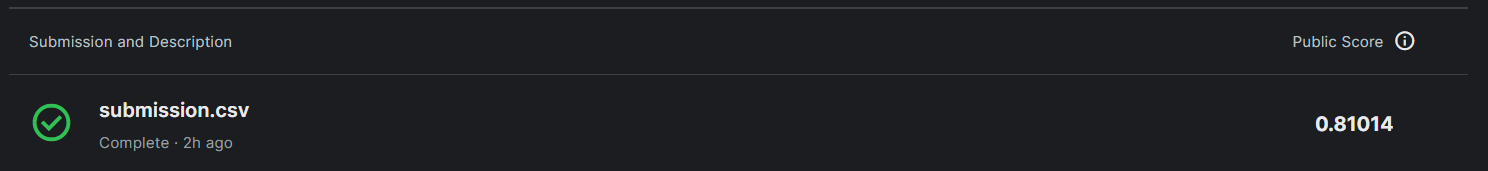